<a href="https://colab.research.google.com/github/andrewshiva/Predicting-the-Propensity-of-Term-Deposit-Purchases-in-a-Bank-using-feature-engineering/blob/master/Predicting_the_Propensity_of_Term_Deposit_Purchases_in_a_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'


In [0]:
# Loading the data using pandas
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
# Printing the shape of the data
print(bankData.shape)

(45211, 17)


In [0]:
# Summarizing the statistics of the numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [0]:
# Importing library files
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Create a simple list of categories
jobList = ['admin','scientist','doctor','management']

In [0]:
# Getting two categories ( 'yes','No') for each of jobs
jobYes = [20,60,70,40]
jobNo = [80,40,30,60]

In [0]:
# Get the length of x axis labels and arranging its indexes
xlabels = len(jobList)
ind = np.arange(xlabels)


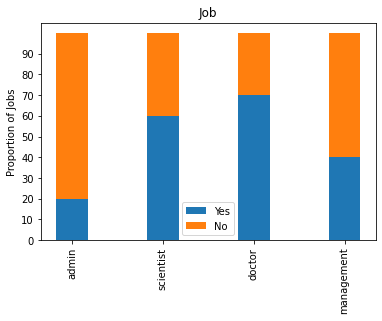

In [0]:
# Get width of each bar
width = 0.35

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)
# Getting the labels for the plots 
plt.ylabel('Proportion of Jobs')
plt.title('Job')
# Defining the x label indexes and y label indexes
plt.xticks(ind, jobList)
plt.yticks(np.arange(0, 100, 10))
# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()

In [0]:
import pandas as pd
import altair as alt

In [0]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
bankData = pd.read_csv(file_url, sep=";")

In [0]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [0]:
# Visualising the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [0]:
# Getting another perspective
ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [0]:
# Getting all the details in one place
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [0]:
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [0]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [0]:
# Relationship between housing and propensity for term deposits
bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [0]:
# Relationship between having a loan and propensity for term deposits
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [64]:
#Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [65]:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'
bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092,5,5,2.307,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073,5,5,1.827,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.073,1,5,0.364,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086,5,5,2.162,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.073,5,1,0.364,Quant1


In [67]:
# Calculating the customers under each quantile
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot


,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [66]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [59]:
# Merging both the data frames
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.743
1,Quant1,yes,823,11340,7.257
2,Quant2,no,10049,11275,89.126
3,Quant2,yes,1226,11275,10.874
4,Quant3,no,9884,11299,87.477
5,Quant3,yes,1415,11299,12.523
6,Quant4,no,9472,11297,83.845
7,Quant4,yes,1825,11297,16.155


In [0]:
# Normalizing data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

In [69]:
minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
bankData.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092,5,5,2.307,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073,5,5,1.827,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.073,1,5,0.364,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086,5,5,2.162,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.073,5,1,0.364,Quant1


In [0]:
# Adding a small numerical constant to eliminate 0 values
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092279,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073087,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072842,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086496,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072832,5


In [0]:
#Let us transform values for Housing data
bankData['houseTran'] = 5
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
print(bankData.head())

   age           job  marital  ... balanceTran loanTran  houseTran
0   58    management  married  ...    0.092279        5          5
1   44    technician   single  ...    0.073087        5          5
2   33  entrepreneur  married  ...    0.072842        1          5
3   47   blue-collar  married  ...    0.086496        5          5
4   33       unknown   single  ...    0.072832        5          1

[5 rows x 21 columns]


In [0]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092279,5,5,2.306984
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073087,5,5,1.827166
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072842,1,5,0.364208
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086496,5,5,2.162403
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072832,5,1,0.364162


In [54]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37673646, 0.56925367, 1.9029749 ])

In [55]:
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
bankData.head()
bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'
bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092,5,5,2.307,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073,5,5,1.827,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.073,1,5,0.364,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086,5,5,2.162,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.073,5,1,0.364,Quant1


In [60]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10907,12198,89.416
1,Quant1,yes,1291,12198,10.584
2,Quant2,no,8450,10414,81.141
3,Quant2,yes,1964,10414,18.859
4,Quant3,no,10129,11106,91.203
5,Quant3,yes,977,11106,8.797
6,Quant4,no,10436,11493,90.803
7,Quant4,yes,1057,11493,9.197


In [61]:
# Looking at Data types
print(bankData.dtypes)
# Looking at descriptive statistics
print(bankData.describe())

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object
             age     balance        day  ...   loanTran  houseTran  assetIndex
count  45211.000   45211.000  45211.000  ...  45211.000  45211.000   4.521e+04
mean      40.936    1362.272     15.806  ...      4.359      3.223   1.179e+00
std       10.619    3044.766      8.322  ...      1.467      1.988   9.522e-01
min       18.000   -8019.000      1.000  ...      1.000      1.000   2.000e-05
25%       33.000      72.000      8.000

In [62]:
from pandas import set_option
bankNumeric = bankData[['age','balance','day','duration','campaign','pdays','previous']]
set_option('display.width',150)
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


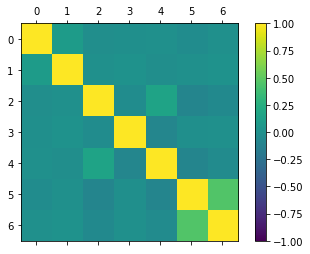

In [49]:
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1)
corFig.colorbar(corAx)
pyplot.show()

In [50]:
# Skewness of numeric attributes
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

KeyError: ignored

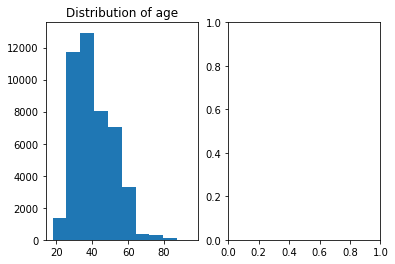

In [70]:
# Histograms
from matplotlib import pyplot

fig, axs = plt.subplots(1,2)

axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')

axs[1].hist(bankNumeric['assetIndex'])
axs[1].set_title('Distribution of Asset Index')

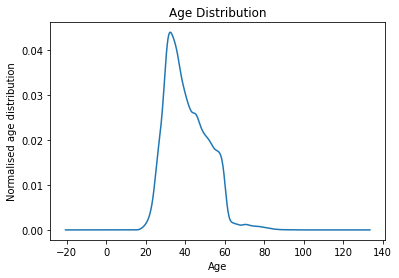

In [71]:
# Density plots
bankNumeric['age'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
pyplot.show()

In [72]:
# Standardize data ( 0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ... -0.569 -0.411 -0.252]
 [ 0.289 -0.438 -1.298 ... -0.569 -0.411 -0.252]
 [-0.747 -0.447 -1.298 ... -0.569 -0.411 -0.252]
 ...
 [ 2.925  1.43   0.143 ...  0.722  1.436  1.05 ]
 [ 1.513 -0.228  0.143 ...  0.399 -0.411 -0.252]
 [-0.371  0.528  0.143 ... -0.247  1.476  4.524]]


In [73]:
 # Normalizing Data ( Length of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  2.315e-03 ...  4.630e-04 -4.630e-04  0.000e+00]
 [ 2.750e-01  1.812e-01  3.125e-02 ...  6.249e-03 -6.249e-03  0.000e+00]
 [ 3.974e-01  2.408e-02  6.021e-02 ...  1.204e-02 -1.204e-02  0.000e+00]
 ...
 [ 1.235e-02  9.805e-01  2.917e-03 ...  8.579e-04  3.157e-02  5.147e-04]
 [ 6.775e-02  7.940e-01  2.021e-02 ...  4.754e-03 -1.189e-03  0.000e+00]
 [ 1.234e-02  9.906e-01  5.668e-03 ...  6.669e-04  6.269e-02  3.668e-03]]


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
bankData.dtypes


age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object

In [76]:
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [77]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [78]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [81]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.89


In [83]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

